# **Employee Turnover Analysis and Predictive Modeling for Salifort Motors HR**

## Description and deliverables

This project involved analyzing HR data from a large consulting firm to identify factors influencing employee attrition and to develop a predictive model to support retention strategies. A logistic regression model was selected to predict the likelihood of an employee leaving the company.

**Deliverables include:**
- One-page summary showing key insights and recommendations for HR stakeholders.
- Code notebook with data processing, exploratory analysis, modeling, and evaluation steps.

# **PACE stages**


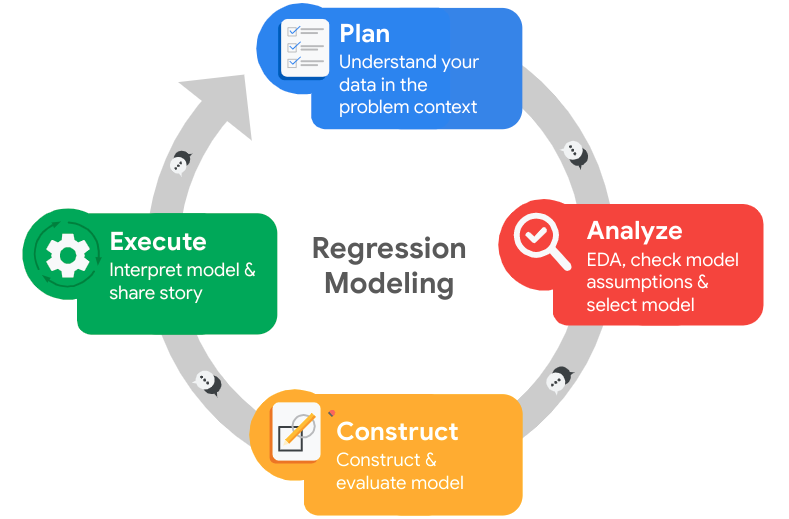

## **PACE Strategy: Plan**

In the planning phase, the objective was to clearly understand the business context and define the problem. The HR department at Salifort Motors needs insights to improve employee satisfaction and retention. Although they collected extensive employee data, they needed guidance on how to interpret it.

The primary question was: **What factors are most likely to cause employees to leave the company?**

The project goal was to analyze the dataset and develop a predictive model to identify employees at risk of leaving. Predicting attrition can help the company take targeted steps to improve retention, which is important because recruiting new employees takes a considerable amount of time and money.

The dataset used for this project consists of 15,000 employee records with 10 key variables relevant to employee retention and satisfaction. This data originates from a publicly available source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Rename columns
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Check and drop duplicates
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Check for outliers in the data.

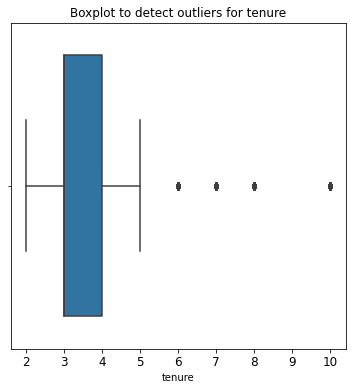

In [11]:
# Check for outliers
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

# Upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# PACE Strategy: Analyze

In the analysis phase, exploratory data analysis (EDA) was conducted to find patterns and relationships among variables. This included visualizing distributions, detecting outliers, and examining correlations for feature selection and preprocessing. EDA helped identify workload and satisfaction as important factors linked to turnover and guided data cleaning steps like handling duplicates and outliers.

In [13]:
print('Number of employees who stayed (0) and number of employees who left (1)')
print(df1['left'].value_counts())
print()
print('Percentage of employees who stayed (0) and percentage of employees who left (1)')
print(df1['left'].value_counts(normalize=True))

Number of employees who stayed (0) and number of employees who left (1)
0    10000
1     1991
Name: left, dtype: int64

Percentage of employees who stayed (0) and percentage of employees who left (1)
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

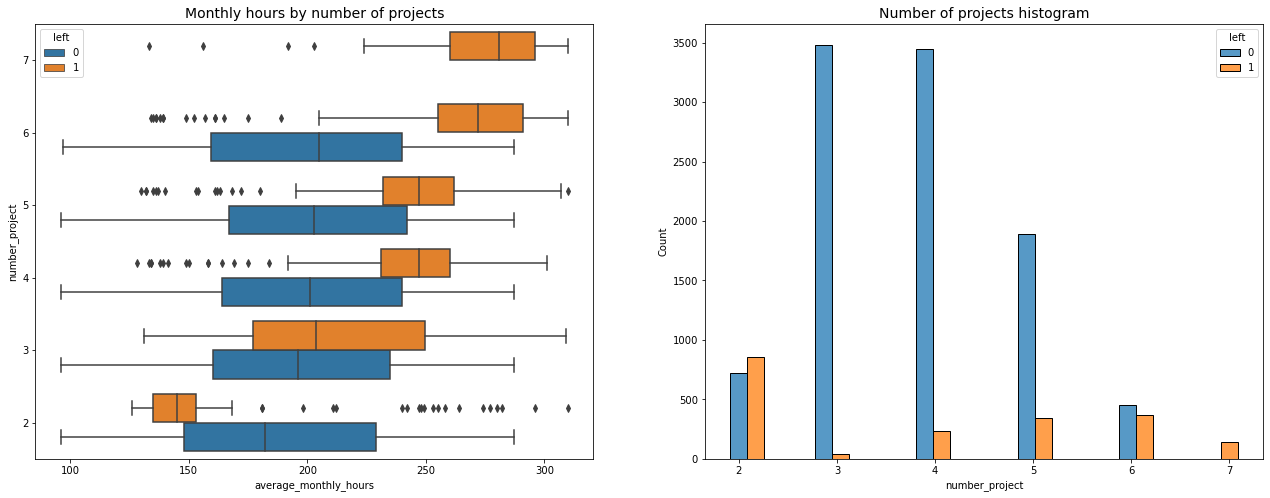

In [14]:
# Boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histogram showing distribution
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

The plots show that the mean hours of each group increases with number of projects worked, which is a natural observation. There are some things that stand out from these visualizations. 

1. The ideal number of projects for employees to work on seems to be 3-4. The ratio of employees who stayed/left is very small for these groups.
2. Everyone with seven projects left the company. The interquartile ranges of this group and those who left with six projects was around 255-295 hours/month, which is more than any other group.

In [15]:
# Number of employees tjat stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects left the company.

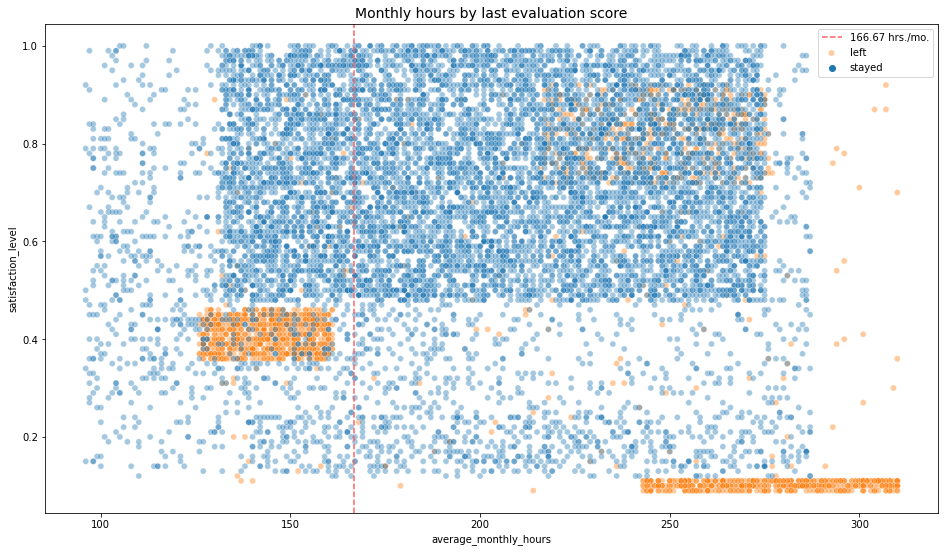

In [16]:
# Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a decently sized group of employees who worked around 240-315 hours each month. Breaking this down per week, it means that these employees worked around 75 hours each week for the entire year. It's reasonable to say that this is related to their satisfaction levels being close to zero.

The scatterplot also shows a group of employees who left even though the number of workng hours was more normal. It's hard to pinpoint why they might have left and why their satisfaction was 0.4, but it's possible that these employees were pressured to work more, which could have been responsible for the low satisfaction levels.

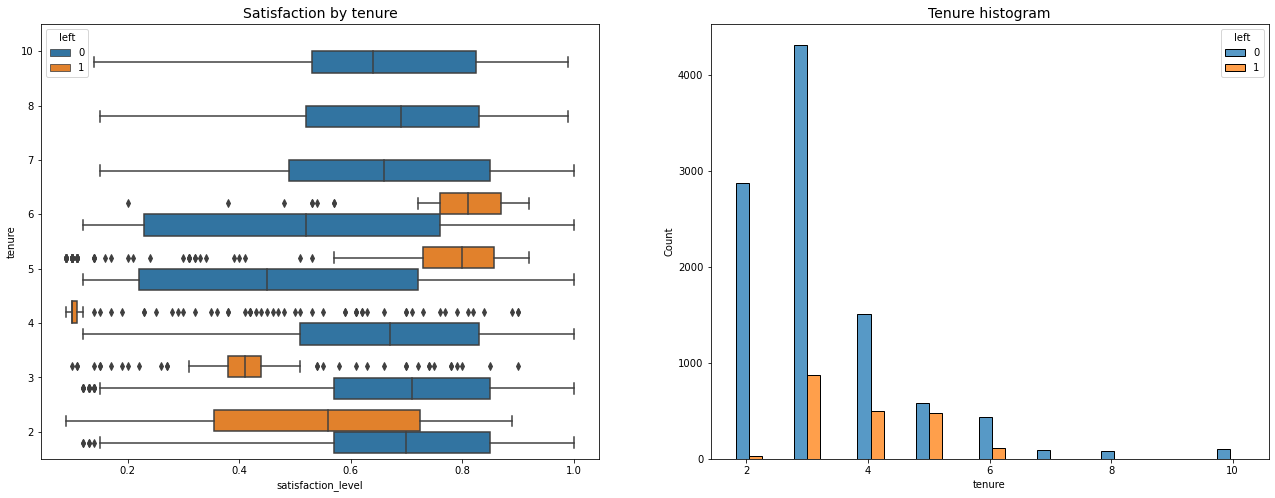

In [17]:
# Boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Histogram showing distribution
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

- There are two groups of employees who left: (A) very satisfied employees with medium-length tenures and (B) very dissatisfied employees with shorter tenures.
- Employees with the longest tenures didn't leave. In fact, their satisfaction levels were similar to newer employees who stayed.
- The histogram shows that there are few longer-tenured employees. These employees may be the higher-ranking, more paid individuals.

In [18]:
# Mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median satisfaction scores of employees who left are lower than those of employees who stayed. The mean satisfaction score of employees who stayed is a little below the median score, which shows that the satisfaction levels among these employees might be skewed to the left.

# PACE Stragegy: Construct

In the construct phase, the focus was on selecting and building an appropriate predictive model to address the problem of employee turnover. Given the binary nature of the outcome variable (whether an employee leaves or stays), logistic regression was chosen.

### Modeling

In [19]:
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


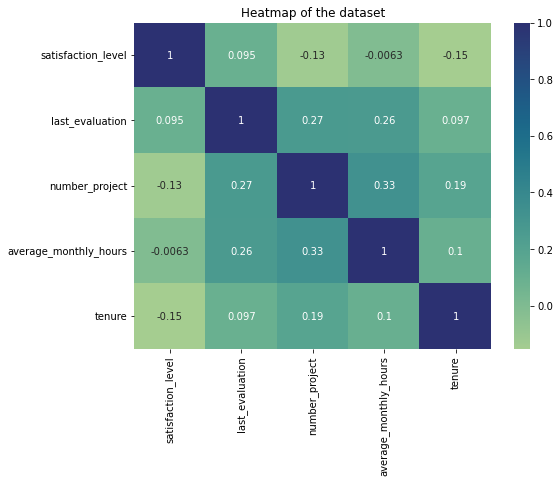

In [20]:
# Heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

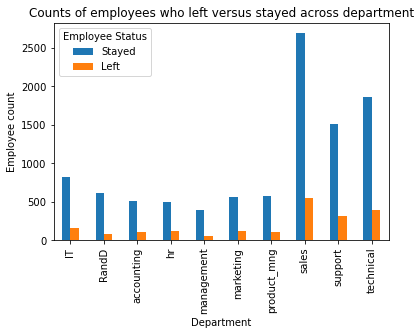

In [21]:
# Stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
ax = pd.crosstab(df1['department'], df1['left']).plot(kind='bar')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
ax.legend(['Stayed', 'Left'], title='Employee Status')
plt.show()

In [22]:
# Select rows without outliers in `tenure`
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# Isolate the outcome variable
y = df_logreg['left']
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [24]:
# Select features that will be used in model
X = df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [26]:
# Create logistic regression model and fit to dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [27]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

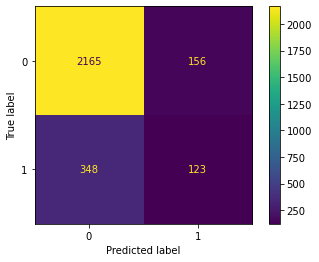

In [28]:
# Confusion matrix to visualize the results
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)
log_disp.plot(values_format='')
plt.show()

The confusion matrix above displays the following:
- Upper-left quadrant: number of true negatives (number of people who did not leave that the model accurately predicted did not leave)
- Upper-right quadrant: number of false positives (number of people who did not leave the model inaccurately predicted as leaving)
- Bottom-left quadrant: number of false negatives (number of people who left that the model inaccurately predicted did not leave)
- Bottom-right quadrant: number of true positives (number of people who left the model accurately predicted as leaving)

In [29]:
# Class balance
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The split is approximately 83%-17%, which means that the data isn't perfectly balanced (but not too imbalanced).

In [30]:
# Classification report for model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model has a precision of 79%, recall of 82%, f1-score of 80%, and an accuracy of 82%.

# PACE Strategy: Execute
The execute phase focuses on interpreting the model’s performance and communicating the key findings to stakeholders. This stage involves translating the results into business insights and recommendations.

### Summary of model results

The logistic regression model achieved the following performance metrics on the test data:
- Precision (80%): Of all employees predicted to leave, 80% actually did leave.
- Recall (83%): Of all employees who actually left, the model correctly identified 83% of them.
- F1-Score (80%): This is the harmonic mean of precision and recall, providing a balanced measure of the model’s accuracy.
- Accuracy (83%): Overall, the model correctly classified 83% of employees, whether they stayed or left.

### Conclusion, Recommendations, Next Steps

The model and the feature importances taken from it show that employees at Sailfort Motors are overworked. To prevent employees from leaving, the following recommendations can be given to the stakeholders: 

- Limit the number of projects assigned per employee to avoid overworking.
- Avoid requiring long working hours; if overtime is necessary, compensate or reward employees accordingly.
- Promote open discussions at both company and team levels to align on work culture and expectations.
- Ensure employees clearly understand pay policies related to overtime and extra work.

**Next Steps**

It would be useful to test the model without the last_evaluation variable, since performance reviews might not occur frequently. This could help build a more practical model that predicts turnover using only readily available data.